In [2]:
import numpy as np
import pickle
import pylab as plt
import pickle

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)    

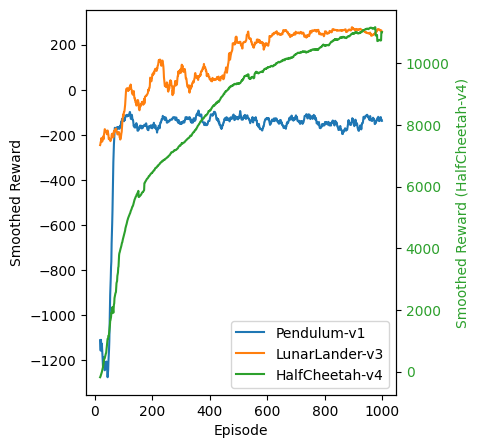

In [101]:
window_size = 20

vals = ["Pendulum-v1", "LunarLander-v3", "HalfCheetah-v4"]
stats = ["SAC_Pendulum-v1-gamma0.99-tau0.005-lr0.0003-alpha0.2-autotuneFalse-pera0.1-perb0.1-seed123456-stat.pkl", "SAC_LunarLander-v3-gamma0.99-tau0.005-lr0.0003-alpha0.2-autotuneFalse-pera0.1-perb0.1-seed123456-stat.pkl", "SAC_HalfCheetah-v4-gamma0.99-tau0.005-lr0.0003-alpha0.2-autotuneFalse-pera0.1-perb0.1-seed123456-stat.pkl"]

fig, ax1 = plt.subplots(figsize=(4,5))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i, f in enumerate(stats):
    with open("../simple_envs/stats/" + str(f), "rb") as file:
        data = pickle.load(file)
        rew = data["rewards_log"][:1000]
        smoothed_rewards = running_mean(rew, window_size)

        if vals[i] == "HalfCheetah-v4":
            ax2 = ax1.twinx()
            ax2.plot(range(window_size - 1, len(rew)), smoothed_rewards, label=vals[i], color=colors[i])
            ax2.set_ylabel("Smoothed Reward (HalfCheetah-v4)")
            ax2.yaxis.label.set_color(colors[i])
            ax2.tick_params(axis='y', labelcolor=colors[i])
        else:
            ax1.plot(range(window_size - 1, len(rew)), smoothed_rewards, label=vals[i], color=colors[i])

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2)

ax1.set_xlabel("Episode")
ax1.set_ylabel("Smoothed Reward")

fig.savefig('simple_env_plots.pdf', bbox_inches='tight', format='pdf')

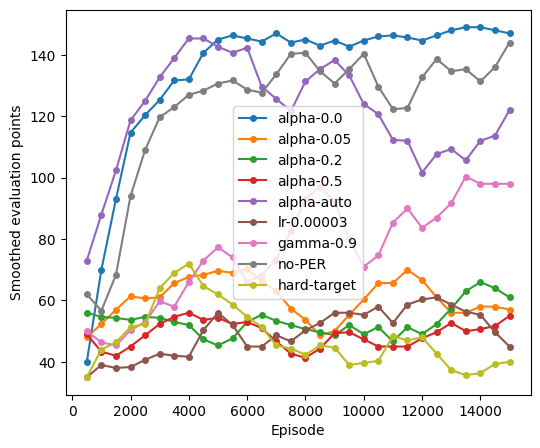

In [102]:
vals = ["alpha-0.0", "alpha-0.05", "alpha-0.2", "alpha-0.5", "alpha-auto", "lr-0.00003", "gamma-0.9", "no-PER", "hard-target"]
stats = ["SAC_Hockey-gamma0.99-tau0.005-lr0.0003-alpha0.0-autotuneFalse-pera0.1-perb0.1-seed280-stat.pkl", "SAC_Hockey-gamma0.99-tau0.005-lr0.0003-alpha0.05-autotuneFalse-pera0.1-perb0.1-seed132-stat.pkl", "SAC_Hockey-gamma0.99-tau0.005-lr0.0003-alpha0.2-autotuneFalse-pera0.1-perb0.1-seed781-stat.pkl", "SAC_Hockey-gamma0.99-tau0.005-lr0.0003-alpha0.5-autotuneFalse-pera0.1-perb0.1-seed505-stat.pkl", "SAC_Hockey-gamma0.99-tau0.005-lr0.0003-alpha0.2-autotuneTrue-pera0.1-perb0.1-seed51-stat.pkl", "SAC_Hockey-gamma0.99-tau0.005-lr3e-05-alpha0.2-autotuneTrue-pera0.1-perb0.1-seed867-stat.pkl", "SAC_Hockey-gamma0.9-tau0.005-lr0.0003-alpha0.2-autotuneTrue-pera0.1-perb0.1-seed925-stat.pkl", "SAC_Hockey-gamma0.99-tau0.005-lr0.0003-alpha0.2-autotuneTrue-pera0.0-perb0.1-seed561-stat.pkl", "SAC_Hockey-gamma0.99-tau1.0-lr0.0003-alpha0.2-autotuneTrue-pera0.1-perb0.1-seed48-stat.pkl"]
x_vals = list(range(500, 15001, 500))

plt.figure(figsize=(6,5))

for i, f in enumerate(stats):
    with open(str(f), "rb") as file:
        data = pickle.load(file)
        winners = data["eval_winner_log"]
        assert len(winners) == 1500
        points_per_500 = []
        for j in range(len(winners) // 50):
            current_eval_results = winners[(j*50):((j+1)*50)]
            points = 0
            for k in current_eval_results:
                if k == 1:
                    points += 3
                if k == 0:
                    points += 1
            points_per_500.append(points)
        assert len(points_per_500) == len(x_vals)
        smooth = 3

        if smooth > 1:
            # Apply smoothing to the middle points
            moving_avg = np.convolve(points_per_500, np.ones(smooth)/smooth, mode='valid')

            # Include the unsmoothed points for the beginning and end
            smoothed_points = points_per_500[:((smooth-1)//2)] + moving_avg.tolist() + points_per_500[-(smooth//2):]
        
            plt.plot(x_vals, smoothed_points, label=vals[i], marker='o', markersize=4)
        else:
            plt.plot(x_vals, points_per_500, label=vals[i], marker='o', markersize=4)

plt.xlabel("Episode")
plt.ylabel("Smoothed evaluation points")
plt.legend()
plt.savefig('training_eval.pdf', bbox_inches='tight', format='pdf')

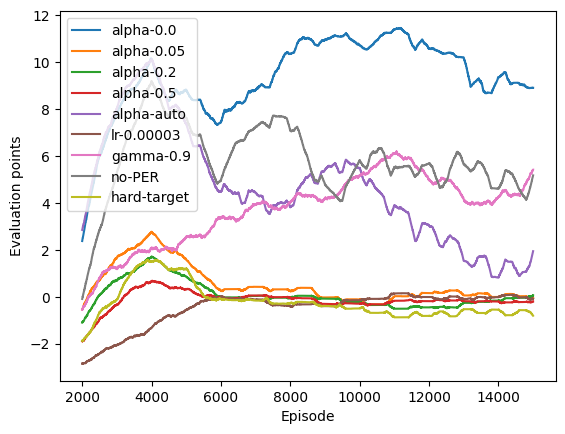

In [51]:
window_size = 2000

vals = ["alpha-0.0", "alpha-0.05", "alpha-0.2", "alpha-0.5", "alpha-auto", "lr-0.00003", "gamma-0.9", "no-PER", "hard-target"]
stats = ["SAC_Hockey-gamma0.99-tau0.005-lr0.0003-alpha0.0-autotuneFalse-pera0.1-perb0.1-seed280-stat.pkl", "SAC_Hockey-gamma0.99-tau0.005-lr0.0003-alpha0.05-autotuneFalse-pera0.1-perb0.1-seed132-stat.pkl", "SAC_Hockey-gamma0.99-tau0.005-lr0.0003-alpha0.2-autotuneFalse-pera0.1-perb0.1-seed781-stat.pkl", "SAC_Hockey-gamma0.99-tau0.005-lr0.0003-alpha0.5-autotuneFalse-pera0.1-perb0.1-seed505-stat.pkl", "SAC_Hockey-gamma0.99-tau0.005-lr0.0003-alpha0.2-autotuneTrue-pera0.1-perb0.1-seed51-stat.pkl", "SAC_Hockey-gamma0.99-tau0.005-lr3e-05-alpha0.2-autotuneTrue-pera0.1-perb0.1-seed867-stat.pkl", "SAC_Hockey-gamma0.9-tau0.005-lr0.0003-alpha0.2-autotuneTrue-pera0.1-perb0.1-seed925-stat.pkl", "SAC_Hockey-gamma0.99-tau0.005-lr0.0003-alpha0.2-autotuneTrue-pera0.0-perb0.1-seed561-stat.pkl", "SAC_Hockey-gamma0.99-tau1.0-lr0.0003-alpha0.2-autotuneTrue-pera0.1-perb0.1-seed48-stat.pkl"]

for i, f in enumerate(stats):
    with open(str(f), "rb") as file:
        data = pickle.load(file)
        rew = data["rewards_log"]
        smoothed_rewards = running_mean(rew, window_size)
        plt.plot(range(window_size - 1, len(rew)), smoothed_rewards, label=vals[i])

plt.xlabel("Episode")
plt.ylabel("Evaluation points")
plt.legend()

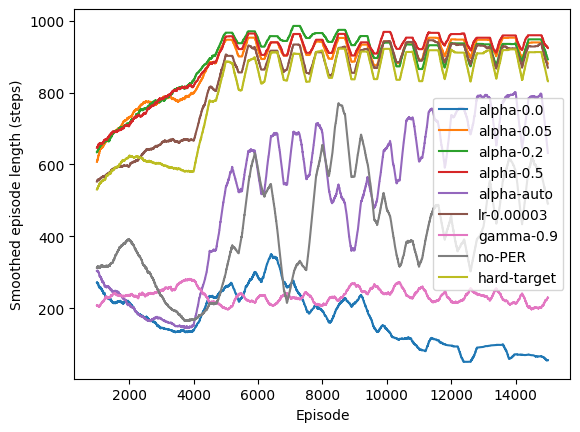

In [6]:
# My training used a maximum episode length of 1000, which wasn't that smart and delayed training, so sticking to the default one (250) is probably more appropriate

window_size = 1000

vals = ["alpha-0.0", "alpha-0.05", "alpha-0.2", "alpha-0.5", "alpha-auto", "lr-0.00003", "gamma-0.9", "no-PER", "hard-target"]
stats = ["SAC_Hockey-gamma0.99-tau0.005-lr0.0003-alpha0.0-autotuneFalse-pera0.1-perb0.1-seed280-stat.pkl", "SAC_Hockey-gamma0.99-tau0.005-lr0.0003-alpha0.05-autotuneFalse-pera0.1-perb0.1-seed132-stat.pkl", "SAC_Hockey-gamma0.99-tau0.005-lr0.0003-alpha0.2-autotuneFalse-pera0.1-perb0.1-seed781-stat.pkl", "SAC_Hockey-gamma0.99-tau0.005-lr0.0003-alpha0.5-autotuneFalse-pera0.1-perb0.1-seed505-stat.pkl", "SAC_Hockey-gamma0.99-tau0.005-lr0.0003-alpha0.2-autotuneTrue-pera0.1-perb0.1-seed51-stat.pkl", "SAC_Hockey-gamma0.99-tau0.005-lr3e-05-alpha0.2-autotuneTrue-pera0.1-perb0.1-seed867-stat.pkl", "SAC_Hockey-gamma0.9-tau0.005-lr0.0003-alpha0.2-autotuneTrue-pera0.1-perb0.1-seed925-stat.pkl", "SAC_Hockey-gamma0.99-tau0.005-lr0.0003-alpha0.2-autotuneTrue-pera0.0-perb0.1-seed561-stat.pkl", "SAC_Hockey-gamma0.99-tau1.0-lr0.0003-alpha0.2-autotuneTrue-pera0.1-perb0.1-seed48-stat.pkl"]

for i, f in enumerate(stats):
    with open(str(f), "rb") as file:
        data = pickle.load(file)
        lengths = data["lengths_log"]
        smoothed_lengths = running_mean(lengths, window_size)
        plt.plot(range(window_size - 1, len(lengths)), smoothed_lengths, label=vals[i])

plt.xlabel("Episode")
plt.ylabel("Smoothed episode length (steps)")
plt.legend()